In [1]:
#- Python version 3.8.10 is recommended


#The following template is provided as a guideline only. You can modify it as you need.

#introduce something here " = ""

# -libraries
import numpy
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition


##- visualization
import matplotlib.pyplot as plt

'''
Add here the functions need.
'''

'\nAdd here the functions need.\n'

In [20]:
# #- loading data
digits = sklearn.datasets.load_digits()
X = digits.data
Y = digits.target

# Data analysis

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Digit Visualization Example

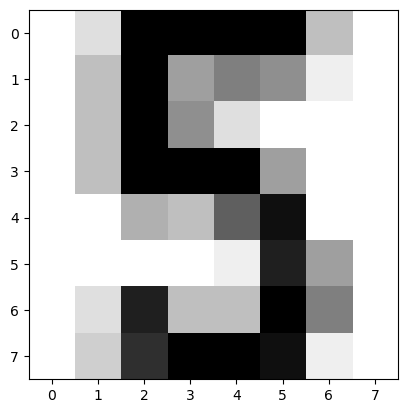

In [5]:
plt.imshow(digits.images[1021], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Digit Shape

In [6]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


### Digit Target Data

In [17]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [23]:
##- split the data 75% train and 25% test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42, stratify=Y)


In [26]:
print("(Num images, Image size)")
print(x_train.shape)
print(x_test.shape)
print("(Predicted number)")
print(y_train.shape)
print(y_test.shape)


(Num images, Image size)
(1347, 64)
(450, 64)
(Predicted number)
(1347,)
(450,)


In [30]:
##- Data normalization by zero mean and unit variance
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [38]:
print("Showing that scaled data has zero mean and unit variance:")
print("Mean")
print(x_train_scaled.mean(axis=0))
print("Variance")
print(x_train_scaled.std(axis=0))

Showing that scaled data has zero mean and unit variance:
Mean
[ 0.00000000e+00 -8.43176061e-17  8.16801052e-17 -2.03252411e-16
  1.10816248e-16  2.53859459e-17 -1.68882478e-16  1.51058742e-16
  1.05293980e-17  2.08527413e-16  1.89735219e-16  7.28609617e-17
 -2.12153977e-16 -4.12521621e-17  3.24742295e-16  3.82643682e-16
  1.32019282e-16  2.95400098e-16 -2.90125096e-17 -1.36820358e-16
 -3.68129700e-17  2.30781327e-17 -7.47566654e-17  2.26701442e-16
 -3.00968728e-16  2.91155370e-17  6.05800982e-17 -4.45078273e-17
  6.92343980e-17 -6.98937732e-17 -2.15615697e-16  1.55664065e-16
  0.00000000e+00 -2.96224317e-16 -6.69265847e-17  1.70943025e-16
 -1.63195367e-16 -1.91878189e-16 -3.51117304e-17  0.00000000e+00
  3.10565728e-16  1.70448494e-16 -5.52226746e-17 -8.72023727e-17
  3.84086065e-17  5.82722850e-17 -1.25610979e-16 -1.43764403e-16
 -1.55694974e-16 -3.36281362e-17  4.82168129e-17  1.47535205e-17
 -1.52315676e-16  5.15136890e-18  3.29028234e-16  3.29069445e-16
 -3.40309732e-16  1.6187661

In [40]:
# apply scaling on testing data having into account x_train statistics
x_test_scaled = scaler.transform (x_test_scaled)
print("Mean")
print(x_test_scaled.mean(axis=0))
print("Variance")
print(x_test_scaled.std(axis=0))

Mean
[ 0.         -0.33202001 -1.10109923 -2.78956289 -2.7458091  -1.0323078
 -0.40150884 -0.11708307 -0.06304883 -0.62794971 -1.94095795 -2.97764414
 -2.13780345 -1.37864259 -0.51685459 -0.12179262 -0.03856149 -0.73441928
 -1.75569622 -1.19662047 -1.14320514 -1.2653785  -0.54670184 -0.11093675
 -0.02725696 -0.7895599  -1.49039565 -1.48553053 -1.61337106 -1.27412003
 -0.62792685 -0.04724556  0.         -0.6678523  -1.2151604  -1.45779963
 -1.75568083 -1.48390051 -0.81646795  0.         -0.06817008 -0.52795421
 -1.05653068 -1.13322273 -1.21564389 -1.45307254 -0.81562819 -0.08487173
 -0.03803606 -0.4005698  -1.33322224 -1.83815003 -1.79458952 -1.45137801
 -0.76607114 -0.19699467 -0.02725696 -0.2976213  -1.09421832 -2.78396408
 -2.39450727 -1.16658906 -0.50750528 -0.19071697]
Variance
[ 0.          1.08815316  0.21300886  0.23621935  0.23168409  0.17706846
  0.30214101  1.01096728 10.61584717  0.31397486  0.1855682   0.24938672
  0.20844164  0.16524574  0.28312449  1.22428848 25.97116645 

In [ ]:
##- Dimensionality reduction: PCA and SVD analysis
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
##- PCA Analysis
pca= PCA().fit(x_train_scaled)
##- the PCA explains a part of the variance. Plot the cumulative variance to get the number of principal
## components we need.
""

In [ ]:
##- SVD Analysis
tsvd = TruncatedSVD().fit_transform(x_train_scaled)
## - Same analysis as PCA: you have to obtain the best number of components for SVD.
""

In [ ]:
## Apply a dimension reduction choosing a 95% of variance explained (x_pca_train, x_tsvd_train, x_pca_test...)
""

In [ ]:
##- Find the k optimal value for the k-NN classifier using 10-fold cross-validation
##
""
##- create the knn classifier
from sklearn import KNeighborsClassifier
clf = KNeighborsClassifier("")

In [ ]:
##- learn the digits on the train subset

clf.fit(x_train_scaled, y_train) # you should also use preprocessed x data

##- predict the value of the digit on the test subset

predicted = clf.predict(x_test_scaled)

In [ ]:
##- print the metrics
""
##- k neighbours analysis: different clsssifier performances varyng the number of k
""